In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = diabetes[['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction']]
Y = diabetes['Age']

<Axes: >

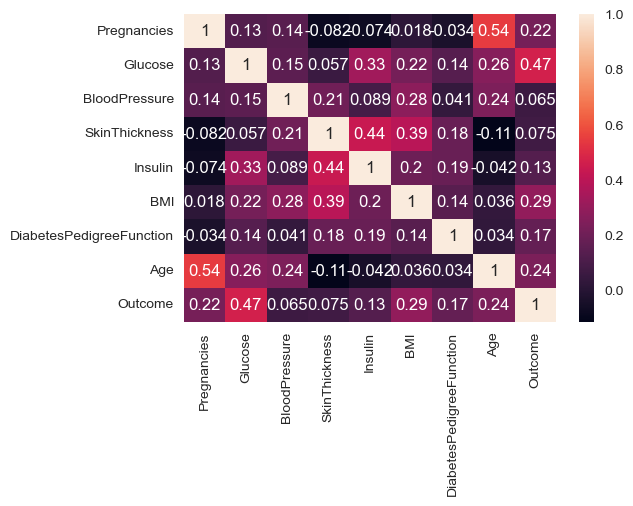

In [19]:
import seaborn as sns
diabetes_corr = diabetes.corr()
fig, ax, = plt.subplots(figsize = (6,4))
sns.heatmap(diabetes_corr, annot=True)

In [16]:
features_names = X.columns
features_names

Index(['Insulin', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction'], dtype='object')

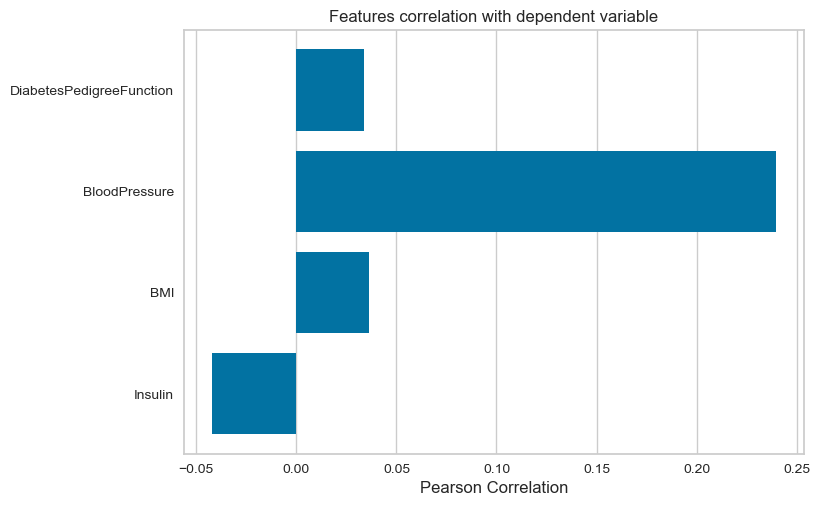

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [17]:
from yellowbrick.target import FeatureCorrelation

visualiez = FeatureCorrelation(labels=features_names, method='pearson')
visualiez.fit(X, Y)
visualiez.poof()

In [20]:
visualiez.scores_

array([-0.04216295,  0.03624187,  0.23952795,  0.03356131])

 ## Multicolinéarité

In [21]:
automobile = pd.read_csv('datasets/cars_processed.csv')
automobile.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,53
1,16.000000,8,304.0,150,3433,12.0,US,53
2,17.000000,8,302.0,140,3449,10.5,US,53
3,14.000000,8,454.0,220,4354,9.0,US,53
4,23.551429,8,440.0,215,4312,8.5,US,53


In [35]:
automobile.corr()

C:\Users\bjauseau\AppData\Local\Temp\ipykernel_1208\688169625.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  automobile.corr()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.746023,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Cylinders,-0.746023,1.000000,0.922633,0.811466,0.873029,-0.458161,0.321850
Displacement,-0.788492,0.922633,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.811466,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.873029,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.458161,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.321850,0.357047,0.404458,0.299049,-0.292705,1.000000


In [37]:
abs(automobile.corr()) > 0.9

C:\Users\bjauseau\AppData\Local\Temp\ipykernel_1208\1127776549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(automobile.corr()) > 0.9


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
MPG,True,False,False,False,False,False,False
Cylinders,False,True,True,False,False,False,False
Displacement,False,True,True,False,True,False,False
Horsepower,False,False,False,True,False,False,False
Weight,False,False,True,False,True,False,False
Acceleration,False,False,False,False,False,True,False
Age,False,False,False,False,False,False,True


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(2)

,VIF Factor,features
0,6.84,Cylinders
1,16.10,Displacement
2,8.82,Horsepower
3,10.69,Weight
4,2.49,Acceleration
5,1.22,Age


## Missing Value Ratio

In [38]:
diabetes_data = pd.read_csv('datasets/diabetes.csv')
# Faire ça pour toutes les colones numériques
df['columns'].replace(0, np.nan, inplace=True)

# Calculer le pourcentage de valeurs manquantes
df['columns'].isnull().sum() / len(df) * 100

# Supprimer les colones en définissant un seul
df_trimmed = df.dropna(thresh=int(df.shape[0] * .9), axis=1)

## Wrapper méthode

In [4]:
automobile = pd.read_csv('datasets/cars_processed.csv')
automobile.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307.0,130,3504,12.0,US,53
1,16.000000,8,304.0,150,3433,12.0,US,53
2,17.000000,8,302.0,140,3449,10.5,US,53
3,14.000000,8,454.0,220,4354,9.0,US,53
4,23.551429,8,440.0,215,4312,8.5,US,53


In [5]:
X = automobile.drop(['MPG', 'Origin'], axis=1)
Y = automobile['MPG']

In [6]:
from sklearn.linear_model import Lasso

In [7]:
lasso = Lasso(alpha=0.8)
lasso.fit(X, Y)

Lasso(alpha=0.8)

In [8]:
predictors = X.columns
coef = pd.Series(lasso.coef_, predictors).sort_values()
print(coef)

Age            -0.673784
Weight         -0.006603
Horsepower     -0.004511
Cylinders      -0.000000
Acceleration    0.000000
Displacement    0.001366
dtype: float64


In [9]:
## Prendre les valeurs les plus fortes
lasso_features = ['Age', 'Weight']
X[lasso_features].head()

,Age,Weight
0,53,3504
1,53,3433
2,53,3449
3,53,4354
4,53,4312


In [10]:
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=4)
decision_tree.fit(X,Y)

DecisionTreeRegressor(max_depth=4)

In [11]:
predictors = X.columns
coef = pd.Series(decision_tree.feature_importances_, predictors).sort_values()
print(coef)

Cylinders       0.000000
Acceleration    0.000000
Weight          0.064613
Age             0.112716
Horsepower      0.177081
Displacement    0.645590
dtype: float64
